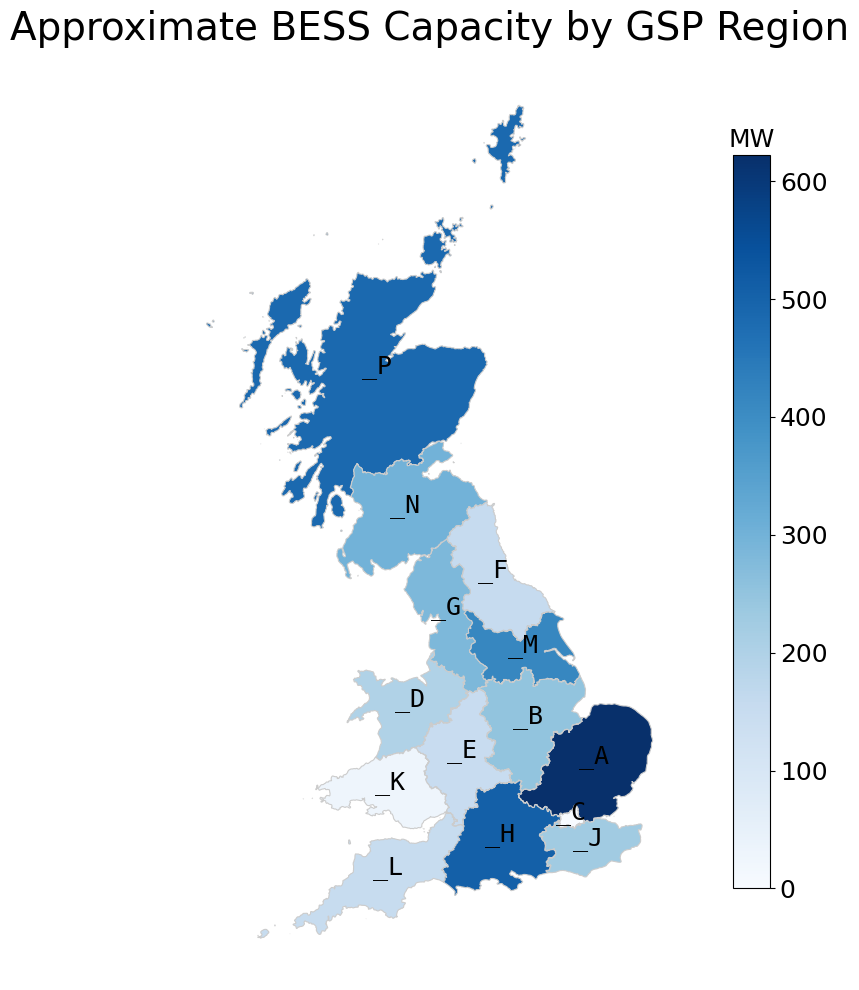

In [26]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# === PATHS ===
shapefile_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\GB Shape File\dno_license_areas_20200506\DNO_License_Areas_20200506.shp"
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Region Shape Chart Data.csv"

# === LOAD SHAPEFILE ===
gdf = gpd.read_file(shapefile_path)

# === LOAD EMISSIONS DATA ===
df_emissions = pd.read_csv(csv_path)

# Check expected columns are present
assert 'Name' in df_emissions.columns, "'Name' column not found in CSV"
assert 'Approx. Capacity' in df_emissions.columns, "'Approx. Capacity' column not found in CSV"

# === MERGE ON 'Name' ===
gdf_merged = gdf.merge(df_emissions[['Name', 'Approx. Capacity']], on='Name', how='left')

# === PLOT ===
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

map_plot = gdf_merged.plot(
    column='Approx. Capacity',
    cmap='Blues',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax,
    legend_kwds={'shrink': 0.8},
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing Approx. Capacity data"
    }
)
# === Increase colorbar label font size ===
# Get the colorbar (a matplotlib.collections.QuadMesh inside the axes)
cbar = map_plot.get_figure().get_axes()[1]  # The colorbar is usually the second axis

# Set larger tick labels
cbar.tick_params(labelsize=18)

# Optional: Set a colorbar title
cbar.set_title("MW", fontsize=18)

ax.set_title('Approximate BESS Capacity by GSP Region', fontsize=28)
ax.axis('off')

# === OPTIONAL: Add region labels ===
for idx, row in gdf_merged.iterrows():
    if pd.notnull(row['Approx. Capacity']):
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, row['Name'], fontsize=18, ha='center', fontfamily='monospace' )

plt.tight_layout()
plt.show()


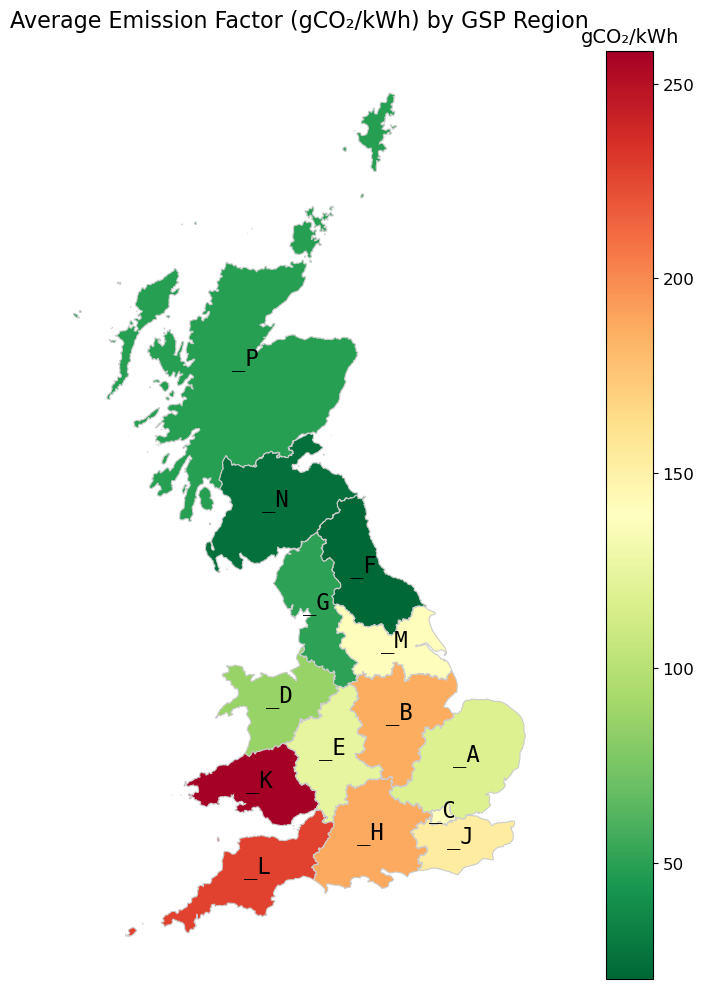

In [17]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# === PATHS ===
shapefile_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\GB Shape File\dno_license_areas_20200506\DNO_License_Areas_20200506.shp"
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Region Shape Chart Data.csv"

# === LOAD SHAPEFILE ===
gdf = gpd.read_file(shapefile_path)

# === LOAD EMISSIONS DATA ===
df_emissions = pd.read_csv(csv_path)

# Check expected columns are present
assert 'Name' in df_emissions.columns, "'Name' column not found in CSV"
assert 'AEF' in df_emissions.columns, "'AEF' column not found in CSV"

# === MERGE ON 'Name' ===
gdf_merged = gdf.merge(df_emissions[['Name', 'AEF']], on='Name', how='left')

# === PLOT ===
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

map_plot = gdf_merged.plot(
    column='AEF',
    cmap='RdYlGn_r',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing AEF data"
    }
)
# === Increase colorbar label font size ===
# Get the colorbar (a matplotlib.collections.QuadMesh inside the axes)
cbar = map_plot.get_figure().get_axes()[1]  # The colorbar is usually the second axis

# Set larger tick labels
cbar.tick_params(labelsize=12)

# Optional: Set a colorbar title
cbar.set_title("gCO₂/kWh", fontsize=14)

ax.set_title('Average Emission Factor (gCO₂/kWh) by GSP Region', fontsize=16)
ax.axis('off')

# === OPTIONAL: Add region labels ===
for idx, row in gdf_merged.iterrows():
    if pd.notnull(row['AEF']):
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, row['Name'], fontsize=16, ha='center', fontfamily='monospace' )

plt.tight_layout()
plt.show()


In [4]:
import geopandas as gpd

# Load the shapefile
shapefile_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\GB Shape File\dno_license_areas_20200506\DNO_License_Areas_20200506.shp"
gdf = gpd.read_file(shapefile_path)

# Check available columns
print(gdf.columns)
print(gdf.head())


Index(['ID', 'Name', 'LongName', 'geometry'], dtype='object')
   ID Name             LongName  \
0  10   _A          UKPN (East)   
1  11   _B  WPD (East Midlands)   
2  12   _C        UKPN (London)   
3  13   _D     SPEN (SP MANWEB)   
4  14   _E       WPD (Midlands)   

                                            geometry  
0  MULTIPOLYGON (((599568.147 183257, 599695.147 ...  
1  POLYGON ((552880 326281, 552887.419 326253.646...  
2  POLYGON ((522000.864 178071.011, 521936.129 17...  
3  MULTIPOLYGON (((250130 390270, 250090 390250, ...  
4  POLYGON ((402835.341 368841.642, 402984.894 36...  


In [1]:
pip install geopandas matplotlib

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ------ --------------------------------- 2.9/19.2 MB 13.9 MB/s eta 0:00:02
   ------------ --------------------------- 6.0/19.2 MB 14.7 MB/s eta 0:00:01
   ------------------ --------------------- 8.9/19.2 MB 14.6 MB/s eta 0:00:01
   ------------------------- -------------- 12.1/19.2 MB 14.5 MB/s eta 0:00:01
   ------------------------------- -------- 15.2/19.2 MB 14.7 MB/s eta 0:00:01
   -------------------------------------- - 18.4/19.2 MB 14.6 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 14.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------------------ --------------------- 2.9/6.3 MB 13.9 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.3 MB 14.7 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 13.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   --------